<h1 align = "center">Model Development and Evaluation</h1>
<ul>The main target here is the development of Multiple Linear Regression model. Also, new models are developed using Random Forest and Decision Trees algorithms. The basis of comparison/evaluation of all the above models is done using MSE (mean square error).</ul>

In [1]:
# importing all the important libraries at once
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#specifying filepath and reading the data
file="D:/Python_DataScience/pandas-demo/Project1/clean1_project_1.csv"
df = pd.read_csv(file)
df = df.iloc[:,1:]
df.head()

,make,body_style,engine_location,aspiration,drive_wheels,wheel_base,width,curb_weight,engine_size,bore,horsepower,price
0,alfa-romero,convertible,front,std,rwd,88.6,64.1,2548,130,3.47,111.0,13495.0
1,alfa-romero,convertible,front,std,rwd,88.6,64.1,2548,130,3.47,111.0,16500.0
2,alfa-romero,hatchback,front,std,rwd,94.5,65.5,2823,152,2.68,154.0,16500.0
3,audi,sedan,front,std,fwd,99.8,66.2,2337,109,3.19,102.0,13950.0
4,audi,sedan,front,std,4wd,99.4,66.4,2824,136,3.19,115.0,17450.0


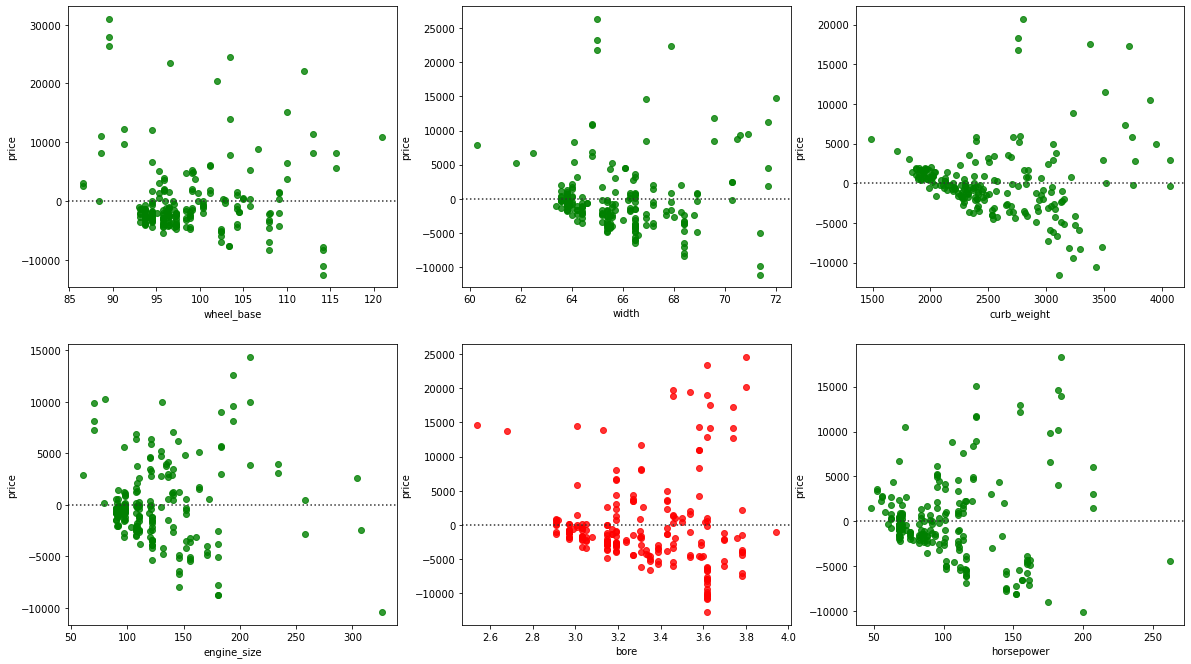

In [3]:
fig = plt.figure(figsize=(20,30)) # create figure
# specifying subplots
ax1 = fig.add_subplot(5, 3, 1) 
ax2 = fig.add_subplot(5, 3, 2) 
ax3 = fig.add_subplot(5, 3, 3) 
ax4 = fig.add_subplot(5, 3, 4) 
ax5 = fig.add_subplot(5, 3, 5) 
ax6 = fig.add_subplot(5, 3, 6) 

dfc = df[["wheel_base","width","curb_weight","engine_size","bore","horsepower"]]

#plotting residualplots
ax1 = sns.residplot(dfc.iloc[:,0], df['price'],ax=ax1,color = "green")
ax2 = sns.residplot(dfc.iloc[:,1],df["price"],ax=ax2,color = "green")
ax3 = sns.residplot(dfc.iloc[:,2], df['price'],ax=ax3,color = "green")
ax4 = sns.residplot(dfc.iloc[:,3],df["price"],ax=ax4,color = "green")
ax5= sns.residplot(dfc.iloc[:,4], df['price'],ax=ax5,color = "red")
ax6= sns.residplot(dfc.iloc[:,5], df['price'],ax=ax6,color = "green")

plt.show()

 Multiple Linear Regression requires that the residuals of each of the independent variables be:
<li> evenly disrtibuted along the 0 line</li>
<li> randomly distributed along the 0 line i.e. no curvilinear shape must be present</li>
Hence, only the variables in green plots are qualified to be entered for Multiple Linear Regression

In [4]:
X= df[["wheel_base","width","curb_weight","engine_size","horsepower"]]
Y = df["price"]
#applying dummy variables for categorical independent variables
dummies = pd.get_dummies(df[["make","drive_wheels","aspiration","body_style","engine_location"]])
dummies
# joining the dummy variables with X 
X = pd.concat([X,dummies], axis=1)
X

,wheel_base,width,curb_weight,engine_size,horsepower,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,...,drive_wheels_rwd,aspiration_std,aspiration_turbo,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,engine_location_front,engine_location_rear
0,88.6,64.1,2548,130,111.0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1,88.6,64.1,2548,130,111.0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
2,94.5,65.5,2823,152,154.0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,99.8,66.2,2337,109,102.0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,99.4,66.4,2824,136,115.0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,109.1,68.9,2952,141,114.0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
197,109.1,68.8,3049,141,160.0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
198,109.1,68.9,3012,173,134.0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
199,109.1,68.9,3217,145,106.0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [5]:
# splitting the dataset into test and train datasets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [6]:
# applying the multiple linear regression model on the dataset  
model1= sm.OLS(y_train,x_train)
# fitting the model
result = model1.fit()
# printing the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     75.45
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           3.86e-72
Time:                        21:22:33   Log-Likelihood:                -1514.5
No. Observations:                 170   AIC:                             3099.
Df Residuals:                     135   BIC:                             3209.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheel_base               120

We have an excellent model with adj R squared value coming out to be 0.937. Since, the p-value for "make_saab","make_chevrolet","make_alfa-romeo" exceeds 0.05, it is not significant and hence, we can remove it

In [7]:
x_train.drop(["make_saab","make_chevrolet","make_alfa-romero"],axis = 1,inplace = True)
x_test.drop(["make_saab","make_chevrolet","make_alfa-romero"],axis = 1,inplace = True)

In [8]:
#applying multiple linear regression again and printing the summary
model1= sm.OLS(y_train,x_train)
result = model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     80.87
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           6.95e-74
Time:                        21:22:33   Log-Likelihood:                -1515.0
No. Observations:                 170   AIC:                             3096.
Df Residuals:                     137   BIC:                             3199.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheel_base               128

There are many independent variables that have p-value greater than 0.05, however, we can stop eliminating more variables as the model we have obtained has adj R squared as 0.938. The model works well

In [9]:
# applying multiple linear regression for prediction on the test dataset
lm = LinearRegression()
lm
lm.fit(x_train,y_train)
Yhat=lm.predict(x_test)
Yhat = pd.DataFrame(Yhat)
# the predicted values
Yhat.head()

,0
0,9632.545259
1,5420.767329
2,12103.447851
3,6998.483621
4,12894.764835


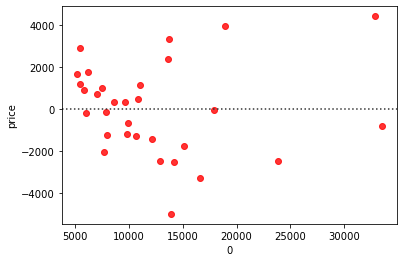

In [10]:
#evaluation using visualization residul plot. Testing Yhat vs y_test
sns.residplot(Yhat, y_test,color = "red")

The trained model works well for the test dataset. The residuals for the test dataset are evenly distributed along the zero line and there is no distinct pattern around the zero line. This suggests that Multiple Linear Regression model works well.

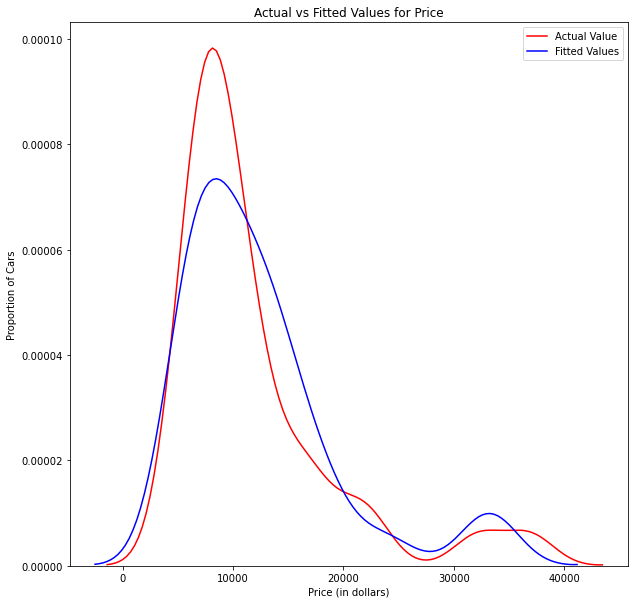

In [11]:
# evaluation using visualization
plt.figure(figsize=(10, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

It seems that there is a bit of a difference in the peak region. Other than that, the predicted curve tries to approach the actual curve. This also suggests that the Multiple Linear Regression model works well.

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
# calculating the mse for Multiple Linear Regression model
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  4733006.520059251


## Decision Tree Regressor
<ul> Let us use some advanced algorithms like Decision Tree Regressor for predicting "price" values. </ul>

In [14]:
from sklearn.tree import DecisionTreeRegressor

# define model and set random state as 1
DTR_model = DecisionTreeRegressor(random_state=1)

# fit model on train data
DTR_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [15]:
# predicitng the model on test data
DTR_Yhat = DTR_model.predict(x_test)
print("The predictions are")
DTR_Yhat

The predictions are


array([ 9960. ,  6229. ,  8495. ,  7349. , 11549. ,  5118. , 12764. ,
        6989. , 15985. ,  6855. ,  9988. ,  8249. ,  9639. , 21105. ,
       12170. , 11900. ,  5974.5, 18344. ,  7299. ,  7975. , 10295. ,
        8238. , 41315. , 11900. ,  5974.5, 35550. , 11549. ,  6095. ,
        9988. ,  7799. , 15985. ])

In [16]:
# calculating the mse for DTR model for evaluation
mse1 = mean_squared_error(y_test, DTR_Yhat)
print('The mean square error of price and predicted value is: ', mse1)

The mean square error of price and predicted value is:  3644158.8870967743


## Random Forest Regressor
<ul> Let us use a bit more advanced algorithm: like Random Forest Regressor for predicting "price" values.</ul>

In [17]:
from sklearn.ensemble import RandomForestRegressor
# define model and set the random state as 1
RFR_model = RandomForestRegressor(random_state=1)
# fit the model on train values
RFR_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [18]:
# predicting the model using the test dataset
RFR_Yhat = RFR_model.predict(x_test)
RFR_Yhat

array([ 9180.51      ,  6195.32166667,  9062.80833333,  7345.7525    ,
       12454.10416667,  6648.1       , 13382.07      ,  7842.7       ,
       14943.95666667,  5965.06916667, 10540.245     ,  7293.45833333,
       10744.82333333, 18822.9675    , 12175.38440476, 13194.785     ,
        5997.59833333, 20160.13      ,  7198.79      ,  8177.12      ,
        9230.43      ,  8529.17      , 36980.78      , 13639.685     ,
        5959.38      , 36050.85      , 13433.29333333,  6176.58333333,
       10414.66333333,  7495.37      , 15500.61      ])

In [19]:
# calculating the mse for Random Forest Model
mse2 = mean_squared_error(y_test, RFR_Yhat)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  2474712.724078608


# Conclusion

In [20]:
print('The mean square error using Multiple Linear Regression is: ', mse)
print('The mean square error using Decision Tree Regressor is: ', mse1)
print('The mean square error using Random Forest Regressor is: ', mse2)

The mean square error using Multiple Linear Regression is:  4733006.520059251
The mean square error using Decision Tree Regressor is:  3644158.8870967743
The mean square error using Random Forest Regressor is:  2474712.724078608


Since the MSE (mean square error) for Random Forest algorithm is the least, Random Forest Regressor is the best model for this problem.